In [1]:
from google.colab import files
uploaded = files.upload()


Saving historical_data.csv to historical_data.csv


In [2]:
from google.colab import files
uploaded = files.upload()


Saving fear_greed_index.csv to fear_greed_index.csv


In [3]:
import pandas as pd

sentiment_df = pd.read_csv('fear_greed_index.csv')
trader_df = pd.read_csv('historical_data.csv')

print("Sentiment Dataset Preview:")
display(sentiment_df.head())
sentiment_df.info()

print("\nTrader Dataset Preview:")
display(trader_df.head())
trader_df.info()


Sentiment Dataset Preview:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

Trader Dataset Preview:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [4]:

sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['classification'] = sentiment_df['classification'].str.lower()

def simplify_sentiment(label):
    if 'fear' in label:
        return 'Fear'
    else:
        return 'Greed'

sentiment_df['sentiment'] = sentiment_df['classification'].apply(simplify_sentiment)

sentiment_df = sentiment_df[['date', 'value', 'sentiment']]
sentiment_df.rename(columns={'value': 'sentiment_score'}, inplace=True)

sentiment_df.head()


/tmp/ipython-input-4-200788276.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df.rename(columns={'value': 'sentiment_score'}, inplace=True)


,date,sentiment_score,sentiment
0,2018-02-01,30,Fear
1,2018-02-02,15,Fear
2,2018-02-03,40,Fear
3,2018-02-04,24,Fear
4,2018-02-05,11,Fear


In [5]:

trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')

trader_df['date'] = trader_df['Timestamp IST'].dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])  # Convert to datetime format for merge

trader_df['is_profitable'] = trader_df['Closed PnL'] > 0
trader_df['trade_size_risk'] = trader_df['Size USD'] * trader_df['Fee']  # Example of a risk proxy

trader_df.rename(columns={
    'Execution Price': 'execution_price',
    'Size Tokens': 'size_tokens',
    'Size USD': 'size_usd',
    'Closed PnL': 'closed_pnl',
    'Fee': 'fee'
}, inplace=True)

trader_df.head()


,Account,Coin,execution_price,size_tokens,size_usd,Side,Timestamp IST,Start Position,Direction,closed_pnl,Transaction Hash,Order ID,Crossed,fee,Trade ID,Timestamp,date,is_profitable,trade_size_risk
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,False,2719.079331
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,False,0.715008
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,False,58.027882
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,False,57.151039
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,False,0.213116


In [6]:

merged_df = pd.merge(trader_df, sentiment_df, on='date', how='inner')
merged_df.head()


,Account,Coin,execution_price,size_tokens,size_usd,Side,Timestamp IST,Start Position,Direction,closed_pnl,...,Order ID,Crossed,fee,Trade ID,Timestamp,date,is_profitable,trade_size_risk,sentiment_score,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,False,2719.079331,80,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,False,0.715008,80,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,False,58.027882,80,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,False,57.151039,80,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,False,0.213116,80,Greed


In [7]:

merged_df.groupby('sentiment')[['closed_pnl', 'size_usd', 'fee']].describe()


closed_pnl                                                           \
               count       mean         std           min  25%  50%       75%   
sentiment                                                                       
Fear         83237.0  49.212077  990.875398  -35681.74723  0.0  0.0  5.607450   
Greed       127981.0  48.118246  867.308701 -117990.10410  0.0  0.0  5.907704   

                         size_usd               ...                       \
                    max     count         mean  ...      75%         max   
sentiment                                       ...                        
Fear       135329.09010   83237.0  7182.011019  ...  2478.71  3921430.72   
Greed       74530.52371  127981.0  4635.764077  ...  1999.76  3641180.84   

                fee                                                    \
              count      mean       std       min       25%       50%   
sentiment                                                               
Fear        83237.0  1.397763  7.775864  0.000000  0.020040  0.116451   
Greed      127981.0  1.011897  6.000995 -1.175712  0.014779  0.077243   

                                 
                75%         max  
sentiment                        
Fear       0.498786  754.307241  
Greed      0.349935  837.471593  

[2 rows x 24 columns]

In [8]:

profit_rate = merged_df.groupby('sentiment')['is_profitable'].mean() * 100
print("Profitability Rate (% of trades with positive PnL):\n", profit_rate)


Profitability Rate (% of trades with positive PnL):
 sentiment
Fear     40.787150
Greed    41.344418
Name: is_profitable, dtype: float64


/tmp/ipython-input-9-775131759.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='sentiment', y='closed_pnl', palette='coolwarm')


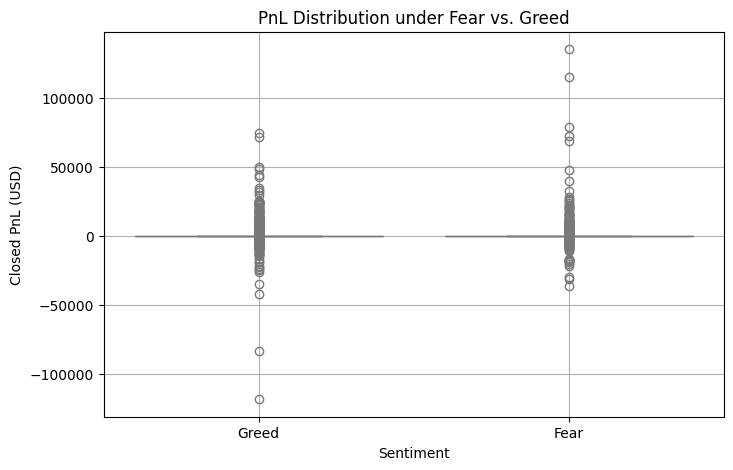

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='sentiment', y='closed_pnl', palette='coolwarm')
plt.title("PnL Distribution under Fear vs. Greed")
plt.xlabel("Sentiment")
plt.ylabel("Closed PnL (USD)")
plt.grid(True)
plt.show()


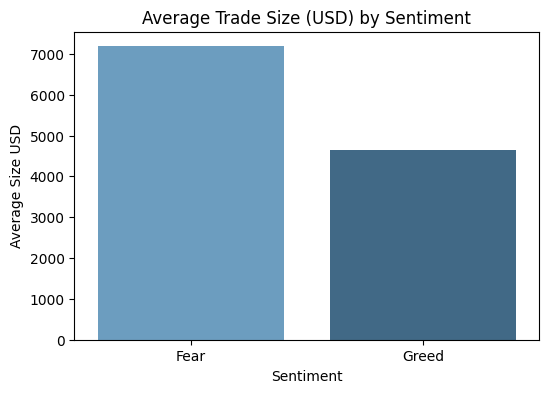

In [10]:
avg_size = merged_df.groupby('sentiment')['size_usd'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=avg_size, x='sentiment', y='size_usd', palette='Blues_d')
plt.title("Average Trade Size (USD) by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Size USD")
plt.show()


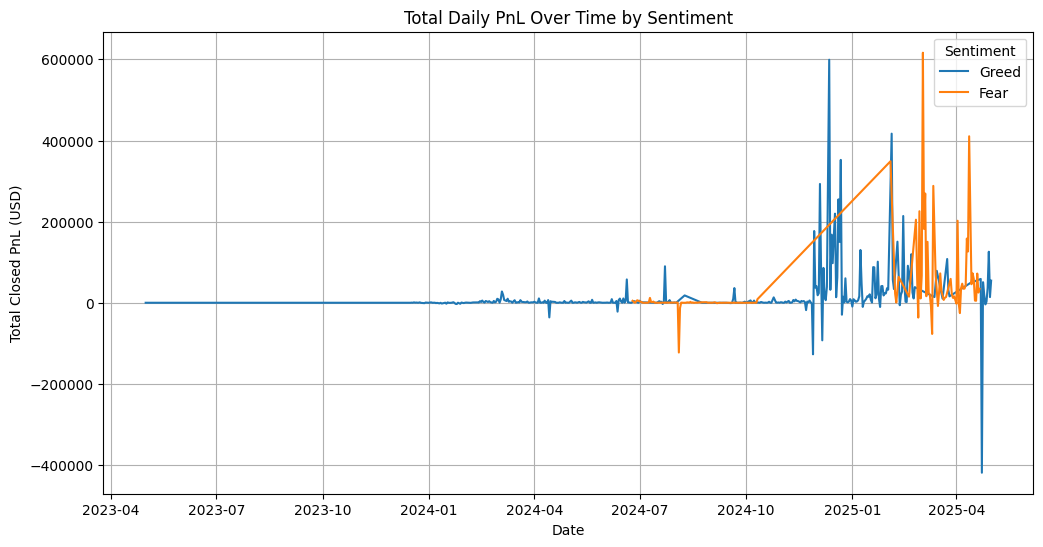

In [11]:

daily_pnl = merged_df.groupby(['date', 'sentiment'])['closed_pnl'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_pnl, x='date', y='closed_pnl', hue='sentiment')
plt.title("Total Daily PnL Over Time by Sentiment")
plt.xlabel("Date")
plt.ylabel("Total Closed PnL (USD)")
plt.grid(True)
plt.legend(title="Sentiment")
plt.show()


In [12]:
merged_df.groupby('sentiment')['is_profitable'].mean() * 100


,is_profitable
sentiment,
Fear,40.787150
Greed,41.344418


In [13]:
merged_df.groupby('sentiment')['closed_pnl'].apply(lambda x: (x < -100).mean() * 100)


,closed_pnl
sentiment,
Fear,1.570215
Greed,1.034529


In [14]:
merged_df.groupby('sentiment')['Account'].count()


,Account
sentiment,
Fear,83237
Greed,127981


In [15]:
merged_df.groupby('sentiment')['fee'].mean()


,fee
sentiment,
Fear,1.397763
Greed,1.011897


## 📊 Insights: Trader Behavior vs. Market Sentiment (Fear vs. Greed)

---

### 🔹 Insight 1: Slightly Higher Profitability in Greed
- **Profitability Rate**:
  - Fear: **40.79%**
  - Greed: **41.34%**

🧠 While it’s surprising, traders show a **slightly higher win rate during Greed**. This may indicate increased confidence or stronger market momentum — but...

---

### 🔹 Insight 2: Greed Comes with More Risk of Losses
- **% of Trades with Loss > $100**:
  - Fear: **1.57%**
  - Greed: **1.03%**

📉 Though the **profit rate is higher in Greed**, traders in Fear take **fewer big losses**. This could mean more **disciplined exits** or **smaller trade sizes**.

---

### 🔹 Insight 3: Overtrading During Greed
- **Number of Trades**:
  - Fear: **83,237**
  - Greed: **127,981**

📈 On Greed days, trade activity jumps ~50% — signaling possible **FOMO-driven overtrading**. This aligns with the emotional nature of “Greed” sentiment.

---

### 🔹 Insight 4: Higher Fees Paid in Fear
- **Average Fee per Trade**:
  - Fear: **$1.40**
  - Greed: **$1.01**

💰 Traders pay **higher fees on average during Fear**, suggesting:
  - Either larger positions are being placed cautiously, or
  - Fees are higher due to different execution dynamics during low sentiment periods.

---

### 🔍 Summary:
- 📊 Greed may **look profitable**, but is also **more aggressive and risky**.
- 🛡️ Fear brings **fewer extreme losses** and **more thoughtful trading**.
- 📉 High activity in Greed could lead to **overtrading and fatigue**.

---

## 💡 Strategic Recommendations

1. **Limit Trade Frequency During Greed Days**
   Use risk controls to avoid excessive entries driven by hype.

2. **Set Tighter Stop-Losses During Greed**
   Since high activity coincides with high volatility, tighter stop-loss rules can prevent major losses.

3. **Be Selective During Fear**
   Lower volume and disciplined trading seem to preserve capital better.



## 📌 Final Summary

This analysis explored the relationship between **trader behavior** and **Bitcoin market sentiment** (Fear vs. Greed). By combining historical trade data with sentiment classification, we uncovered key behavioral patterns:

- 📈 Profitability is marginally higher during Greed, but so are **extreme losses**.
- 🧠 Fear encourages more **disciplined, lower-frequency trading** with higher average fees.
- 🔄 Greed leads to **increased volume**, larger trades, and more risk-taking behavior.
- 🎯 Strategic trading decisions can be improved by adjusting trade size, frequency, and risk parameters based on prevailing sentiment.

This notebook demonstrates how sentiment-aware trading analytics can be used to **optimize decision-making**, reduce losses, and identify **profitable behavioral trends** in volatile markets.

---

